In [1]:
# from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter

# gridSize = ContinuousParameter('gridSize', min_value=3, max_value=20)
# edgeMaxSpeed = ContinuousParameter('edgeMaxSpeed', min_value=1, max_value=25)
# maxSpeed = ContinuousParameter('maxSpeed', min_value=1, max_value=25)
# edgeLength = ContinuousParameter('edgeLength', min_value=30, max_value=200)
# numberOfLanes = DiscreteParameter('numberOfLanes', domain=[1,2,3])
# accel = ContinuousParameter('accel', 1., 6.)

# parameter_space = ParameterSpace([gridSize, edgeMaxSpeed, maxSpeed, edgeLength, numberOfLanes, accel])
import experimental_design.config as config
parameter_space = config.get_parameter_space()

In [2]:
def to_single_value_dict(d: dict) -> dict:
    for k in d.keys():
        d[k] = d[k][0]
    return d

In [3]:
import pickle
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

init_X, init_Y = pickle.load(open('../experimental_design/2000_init_points_6_param.pkl', 'rb')) # load 2000 init points
# init_X, init_Y = pickle.load(open('../experimental_design/250_init_points_6_param.pkl', 'rb')) # load 250 init points

emulator = GPRegression(init_X, init_Y)
emukit_model = GPyModelWrapper(emulator)
emukit_model.optimize()
emulator

Optimization restart 1/1, f = -4217.651207186002


GP_regression.,value,constraints,priors
rbf.variance,5241.003880217442,+ve,
rbf.lengthscale,62.23377303316588,+ve,
Gaussian_noise.variance,0.00031534099967131247,+ve,


In [4]:
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity

num_monte_carlo_points=10000
sensitivity_sumo=MonteCarloSensitivity(model = emukit_model, input_domain = parameter_space)
main_effects, total_effects, total_variance = sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

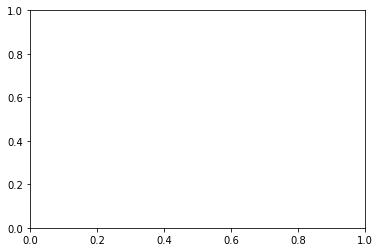

In [5]:
import pandas as pd

import matplotlib.pyplot as plt


main_effects_dict = {'GP Monte Carlo - Initialisation Points': to_single_value_dict(main_effects)}
total_effects_dict = {'GP Monte Carlo - Initialisation Points': to_single_value_dict(total_effects)}
# fig, ax = plt.subplots()
# pd.DataFrame(main_effects_dict).plot.bar(ax=ax)
# ax.set_title('First-order Sobol indices - SUMO Simulation')
# ax.set_ylabel('% of explained output variance')

# fig.show()

# After Optimization

In [6]:
emukit_model = pickle.load(open('../experimental_design/timeLoss_model_variance_100_iter_batch_size_1.pkl', "rb"))
emukit_model.optimize()

In [7]:
num_monte_carlo_points=10000
sensitivity_sumo=MonteCarloSensitivity(model = emukit_model, input_domain = parameter_space)
main_effects, total_effects, total_variance = sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

In [8]:
main_effects_dict['GP Monte Carlo - After Experimental Design'] = to_single_value_dict(main_effects)
total_effects_dict['GP Monte Carlo - After Experimental Design'] = to_single_value_dict(total_effects)

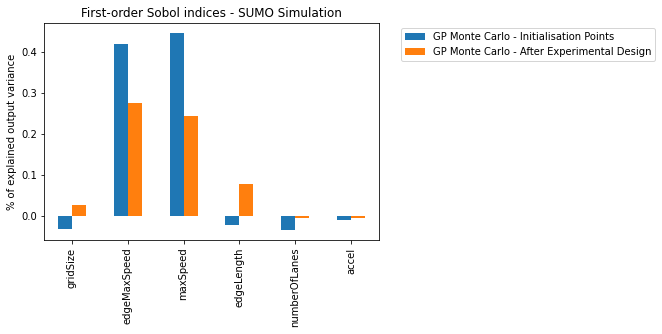

In [11]:
fig, ax = plt.subplots()
pd.DataFrame(main_effects_dict).plot.bar(ax=ax)
ax.set_title('First-order Sobol indices - SUMO Simulation')
ax.set_ylabel('% of explained output variance')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.show()

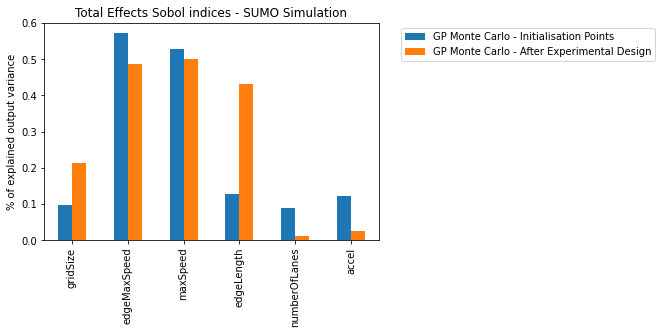

In [12]:
fig, ax = plt.subplots()
pd.DataFrame(total_effects_dict).plot.bar(ax=ax)
ax.set_title('Total Effects Sobol indices - SUMO Simulation')
ax.set_ylabel('% of explained output variance')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.show()